# Assignment 2
## Names: Anant Bamba SN : 301430478, Harmeet Singh Bhullar SN: 


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('/Users/anantbamba/Documents/Jupyter/data/A2/Airline_review.csv', encoding = 'utf-8', usecols = ["Airline Name","Review_Title","Review","Verified"])

In [3]:
df.head()

,Airline Name,Review_Title,Verified,Review
0,AB Aviation,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...
1,AB Aviation,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...
2,AB Aviation,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...
3,Adria Airways,"""I will never fly again with Adria""",False,Please do a favor yourself and do not fly wi...
4,Adria Airways,"""it ruined our last days of holidays""",True,Do not book a flight with this airline! My fr...


In [4]:
df= df[df["Verified"]==True]
Adria_df=df[df["Airline Name"]=="Adria Airways"]
Lufthansa_df=df[df["Airline Name"]=="Lufthansa"] 
Turkish_df=df[df["Airline Name"]=="Turkish Airlines"]

In [6]:
Turkish_df.drop("Verified",axis = 1).head()



,Airline Name,Review_Title,Review
21158,Turkish Airlines,"""dismal to be exact""","The ticketing and flight experiences, both, w..."
21159,Turkish Airlines,"""I will miss my connection""",Last time that I will fly with Turkish Airli...
21161,Turkish Airlines,"""flights could have been better""",Extra legroom not possible for over 65. We bo...
21162,Turkish Airlines,"""My worst ever experience""",My worst ever experience. I travelled with b...
21163,Turkish Airlines,"""Application not working""",Flight from Beijing to Istanbul. Application ...


In [7]:
Lufthansa_df.drop("Verified",axis = 1).head()

,Airline Name,Review_Title,Review
14078,Lufthansa,"""The customer service was bad""",London to Berlin via Munich. The day before ...
14079,Lufthansa,"""Truly excellent experience""",Truly excellent experience with Lufthansa. F...
14080,Lufthansa,"""there was a massive baggage delay""",Flight was delayed by about 60+ mins on the ...
14081,Lufthansa,"""always an unpleasant experience""",This is becoming a rule when I fly with Lufth...
14085,Lufthansa,"""Second time I’ve had problems""",For reasons of bad weather we were redirecte...


In [8]:
Adria_df.drop("Verified",axis = 1).head()

,Airline Name,Review_Title,Review
4,Adria Airways,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...
5,Adria Airways,"""Had very bad experience""",Had very bad experience with rerouted and ca...
8,Adria Airways,"""combined two flights""",Worst Airline ever! They combined two flight...
9,Adria Airways,"""the crew was nice""",Ljubljana to Munich. The homebase airport of ...
11,Adria Airways,"""bad customer service""",Vienna to Sofia. The flight was delayed by 2...


In [27]:
Adria_rev = Adria_df['Review'].dropna()

In [28]:
Adria_rev

4      Do not book a flight with this airline! My fr...
5       Had very bad experience with rerouted and ca...
8       Worst Airline ever! They combined two flight...
9      Ljubljana to Munich. The homebase airport of ...
11      Vienna to Sofia. The flight was delayed by 2...
12      We were traveling from Paris to Skopje on Ma...
13      Ljubljana to Munich. Adria's checkin system ...
14      A very unpleasant experience for my family. ...
15      Frankfurt to Ljubljana. Flight was very comf...
16      Ljubljana to Frankfurt. Flight delayed for m...
17      Ljubljana to Vienna. Overall, the flight ser...
18     Two nice short flights from Ljubljana to Sara...
Name: Review, dtype: object

In [29]:
Adria_rev_string = ', '.join(langu.astype(str))

In [30]:
def clean_text(text):
    words = word_tokenize(text.lower())
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_words)

In [31]:
Adria_clean = clean_text(Adria_rev_string)

In [32]:
Adria_clean

'book flight airline friend returned sofia amsterdam september days sent us sms informing flight cancelled straight days tried reach airline web agent get solution finally hours cancelled flight time minutes call waiting airline able get us flight lufthansa book adria airways unreliable case ruined last days holidays since needed phones bad experience rerouted cancelled flights last weekend adria airways original route ljubljana sarajevo return two weeks received email flight cancelled offered route change ljubljana sarajevo via munich flight back changed accepted first flight via munich two hours return flight got email flight cancelled rebook via hotline accept flight croatian zagreb reached ljubljana h later organize transport zagreb ljubljana cost book flights adria airways heard financial situation worst airline ever combined two flights save costs instead flying pristina ljubliana zürich fly pristina ljubliana münchen zürich arrive later ljubljana munich homebase airport adria ai

In [33]:
def clean_text_freq(text):
    words = word_tokenize(text.lower())
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    freq_dist = FreqDist(cleaned_words)
    return freq_dist

In [34]:
Adria_dict = clean_text_freq(Adria_clean)

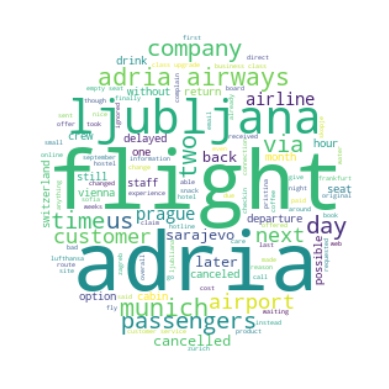

In [35]:
# options
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# this actually generates the word cloud
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(langu_clean)

# and this displays it
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [9]:
# create an instance of the analyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
#Creating functions 
def get_sentiment_scores(text):
    """
    Uses VADER within NLTK to calculate sentiment
    
    Args:
        text (str): a string containing the file or text
        
    Returns: 
        dict: a dictionary that VADER creates
    """
    
    score = analyzer.polarity_scores(text)
    return score



In [11]:
review = df["Review"]
reviewanalyser=review.apply(get_sentiment_scores)



In [12]:
reviewanalyser.values

array([{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9192},
       {'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'compound': -0.9242},
       {'neg': 0.031, 'neu': 0.849, 'pos': 0.121, 'compound': 0.7569},
       ..., {'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'compound': -0.6917},
       {'neg': 0.062, 'neu': 0.859, 'pos': 0.08, 'compound': 0.9588},
       {'neg': 0.235, 'neu': 0.731, 'pos': 0.034, 'compound': -0.886}],
      dtype=object)

In [13]:
reviewanalyser2=pd.DataFrame.from_dict(reviewanalyser)

In [14]:
reviewanalyser2.head()

,Review
0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
1,"{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co..."
2,"{'neg': 0.031, 'neu': 0.849, 'pos': 0.121, 'co..."
4,"{'neg': 0.079, 'neu': 0.846, 'pos': 0.074, 'co..."
5,"{'neg': 0.106, 'neu': 0.811, 'pos': 0.083, 'co..."
